<a href="https://colab.research.google.com/github/nguyentrongson/Moew/blob/master/ADHD_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo dữ liệu giả lập
data = {
    "Age": np.random.randint(6, 18, 300),
    "Gender": np.random.choice(["Male", "Female"], 300),
    "Family_ADHD_History": np.random.choice([0, 1], 300),
    "Inattention_Level": np.random.randint(1, 11, 300),
    "Impulsivity_Frequency": np.random.randint(1, 11, 300),
    "Hyperactivity_Level": np.random.randint(1, 11, 300),
    "Sitting_Still_Time": np.random.randint(1, 11, 300),
    "Sleep_Hours": np.random.randint(4, 10, 300),
    "Electronic_Device_Hours": np.random.randint(1, 8, 300),
    "Peer_Family_Relationship": np.random.choice(["Good", "Average", "Poor"], 300),
    "Academic_Stress": np.random.choice(["Low", "Medium", "High"], 300),
    "ADHD_Risk": np.random.choice([0, 1], 300)
}

df = pd.DataFrame(data)

# Xử lý mã hóa dữ liệu phân loại
encoder_gender = LabelEncoder()
encoder_relationship = LabelEncoder()
encoder_stress = LabelEncoder()

df["Gender"] = encoder_gender.fit_transform(df["Gender"])
df["Peer_Family_Relationship"] = encoder_relationship.fit_transform(df["Peer_Family_Relationship"])
df["Academic_Stress"] = encoder_stress.fit_transform(df["Academic_Stress"])

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X = df.drop("ADHD_Risk", axis=1)
y = df["ADHD_Risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Dự đoán nguy cơ ADHD cho dữ liệu mới
sample_data = {
    "Age": [8],
    "Gender": [encoder_gender.transform(["Male"])[0]],
    "Family_ADHD_History": [1],
    "Inattention_Level": [9],
    "Impulsivity_Frequency": [9],
    "Hyperactivity_Level": [10],
    "Sitting_Still_Time": [2],
    "Sleep_Hours": [5],
    "Electronic_Device_Hours": [6],
    "Peer_Family_Relationship": [encoder_relationship.transform(["Poor"])[0]],
    "Academic_Stress": [encoder_stress.transform(["High"])[0]]
}

sample_df = pd.DataFrame(sample_data)
prediction = model.predict(sample_df)[0]

print("Predicted ADHD Risk:", "Yes" if prediction == 1 else "No")


Accuracy: 0.4666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.36      0.33        22
           1       0.59      0.53      0.56        38

    accuracy                           0.47        60
   macro avg       0.45      0.44      0.44        60
weighted avg       0.49      0.47      0.47        60

Predicted ADHD Risk: No


   Age  Gender  Family_ADHD_History  Inattention_Level  Impulsivity_Frequency  \
0    8       1                    0                  7                      4   
1    8       0                    0                  3                      5   
2    7       1                    0                 10                      3   
3   16       0                    1                  6                      8   
4   14       1                    0                  9                      7   

   Hyperactivity_Level  Sitting_Still_Time  Sleep_Hours  \
0                    4                   7            7   
1                    8                   7            9   
2                    3                   1            9   
3                    9                   1            6   
4                    5                   1            5   

   Electronic_Device_Hours  Peer_Family_Relationship  Academic_Stress  \
0                        3                         2                0   
1           

<Figure size 1200x600 with 0 Axes>

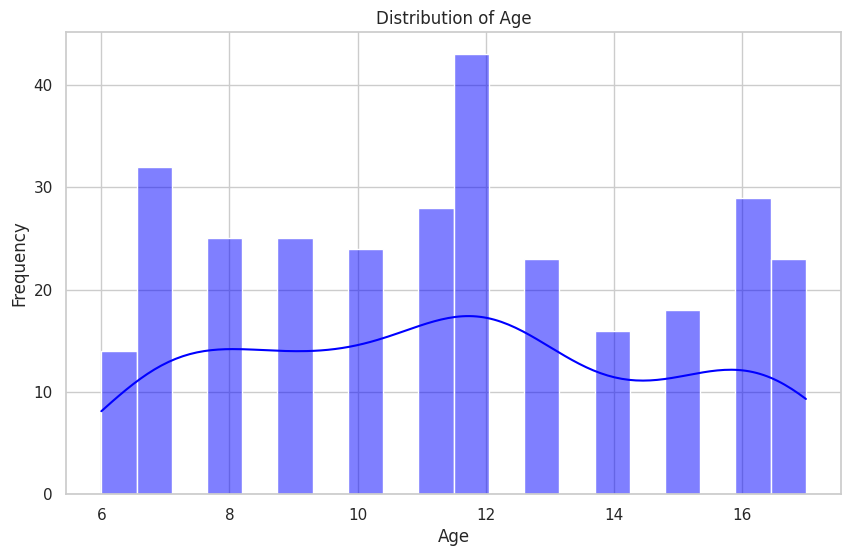

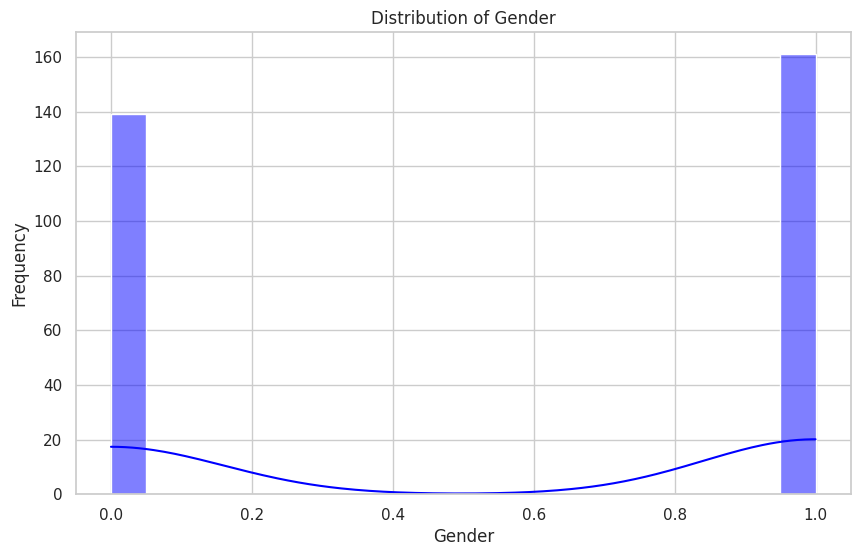

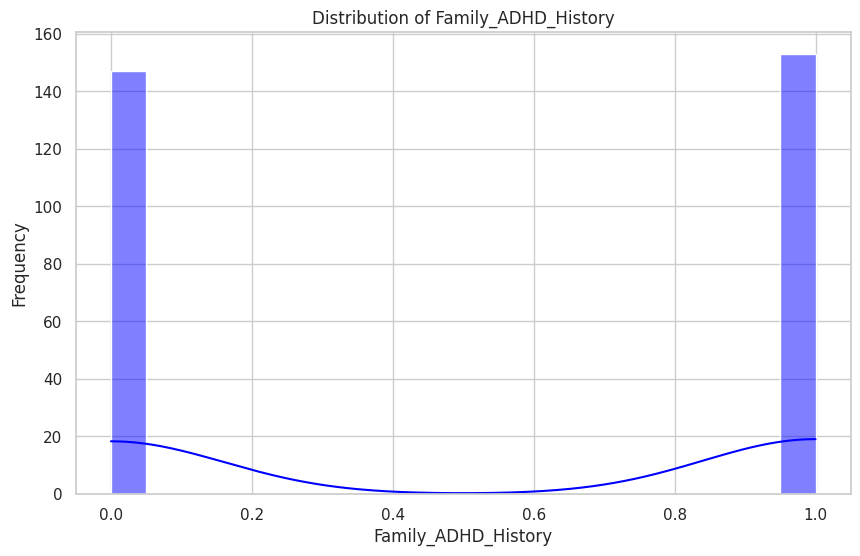

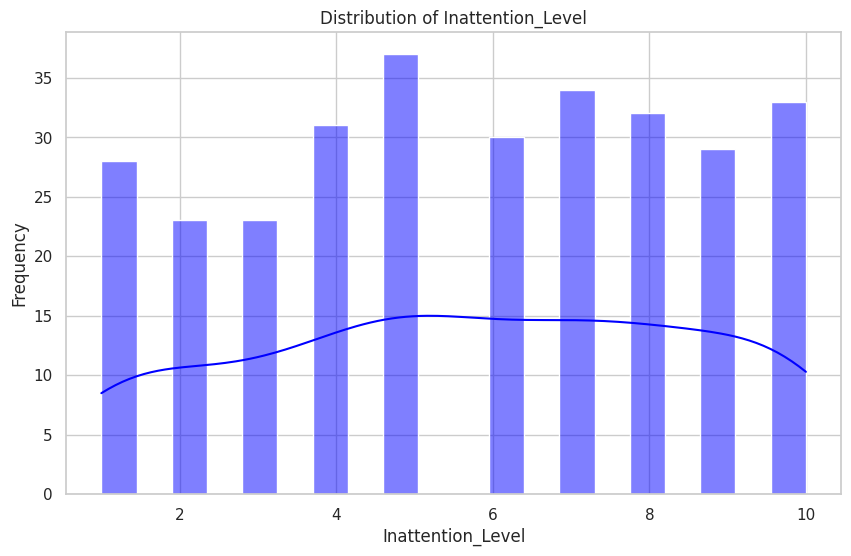

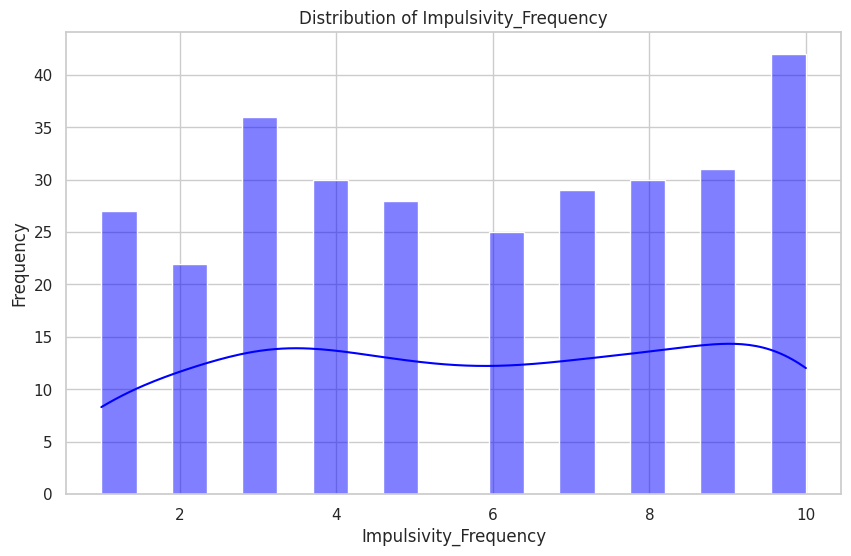

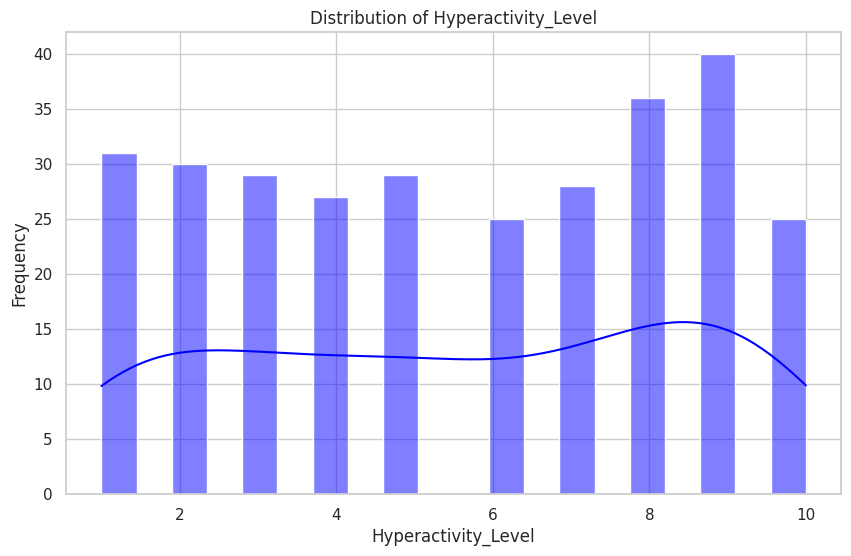

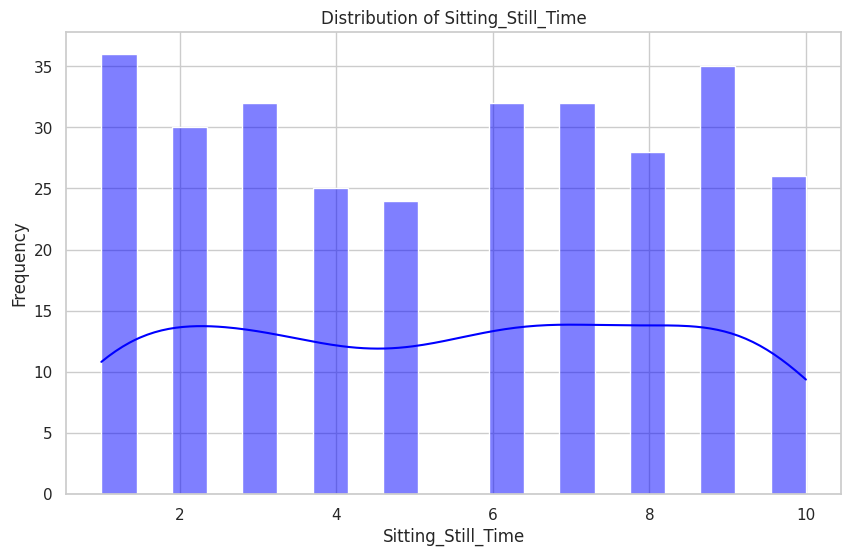

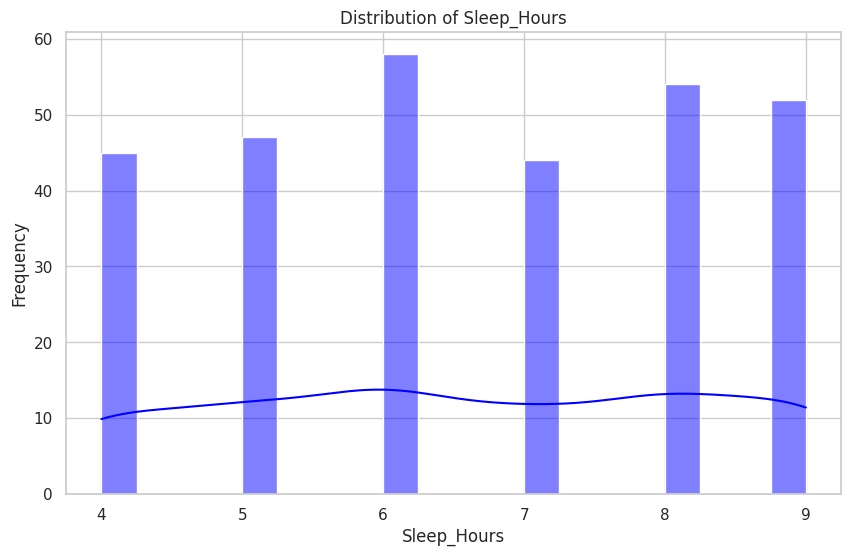

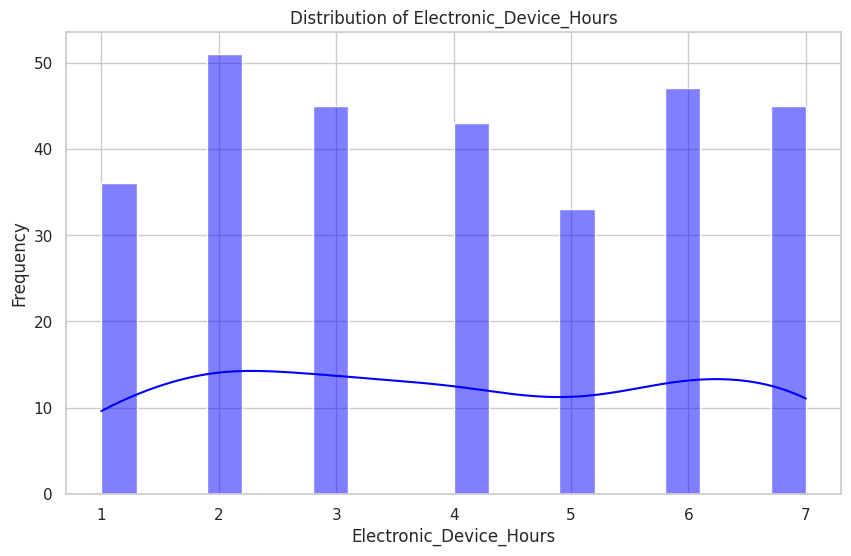

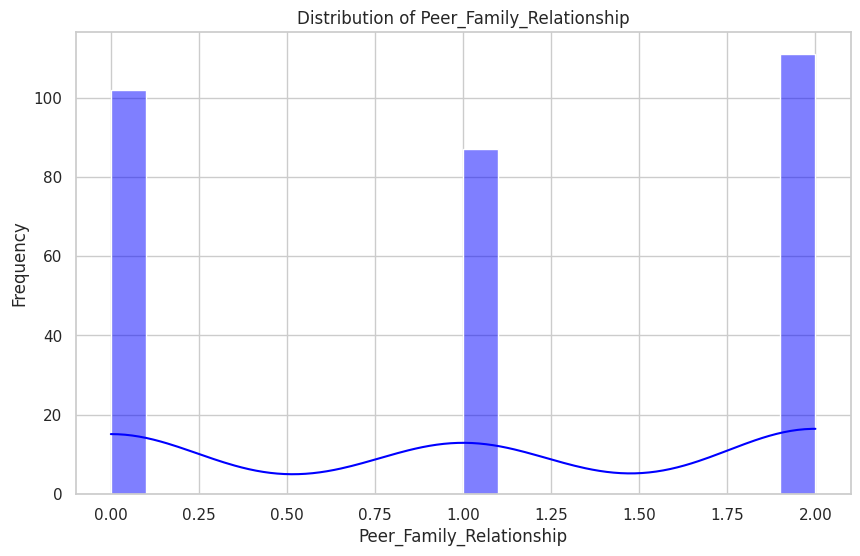

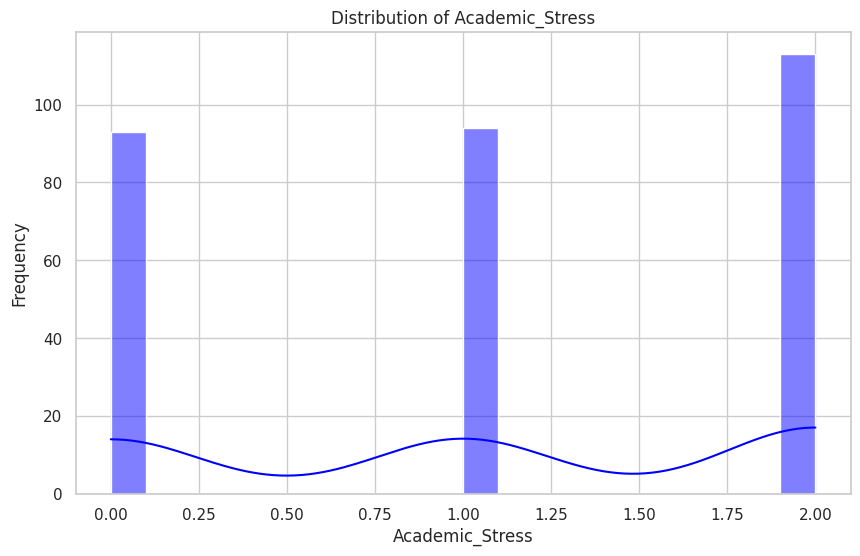

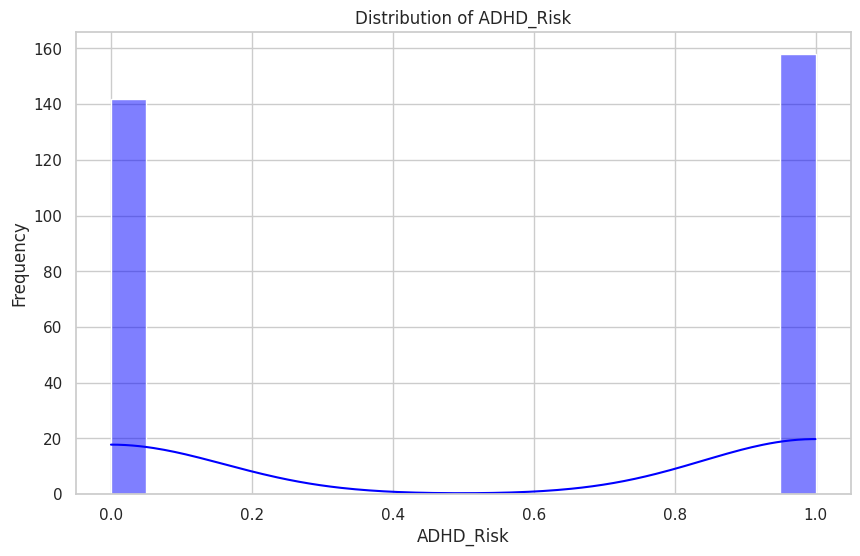

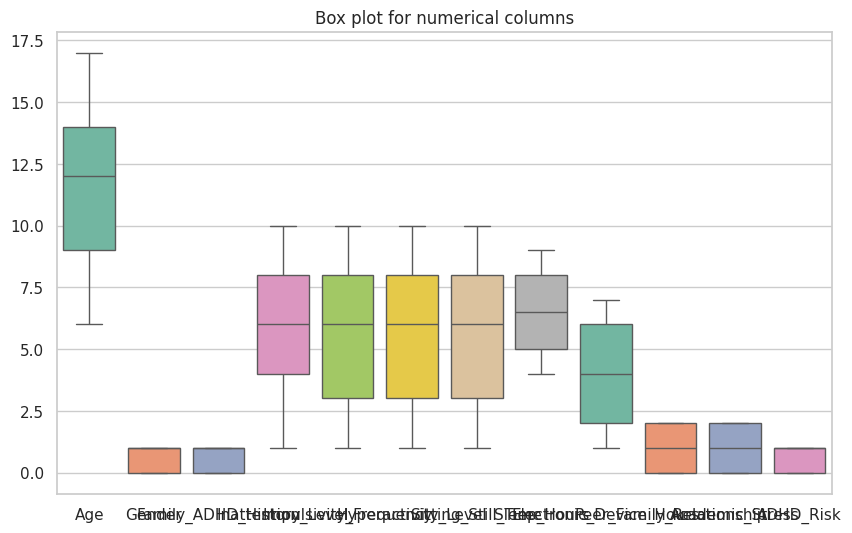

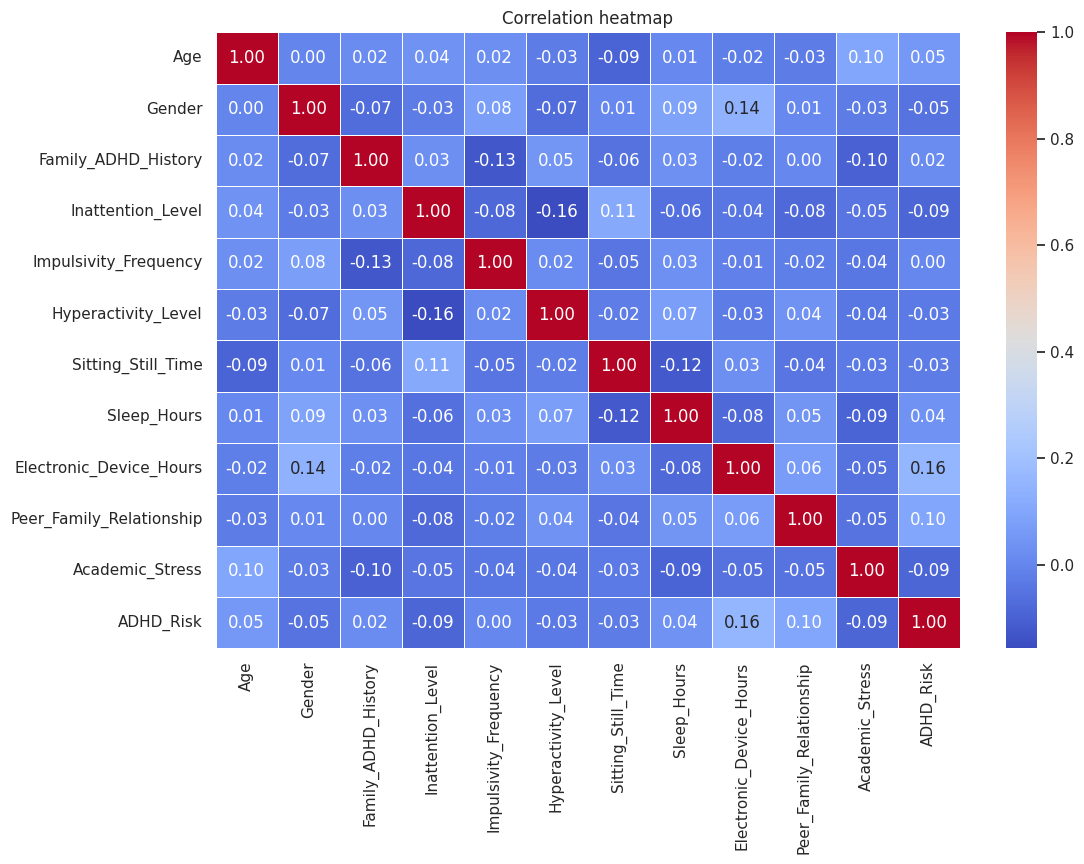

<ipython-input-18-29588adee633>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ADHD_Risk", data=df, palette="Set1")


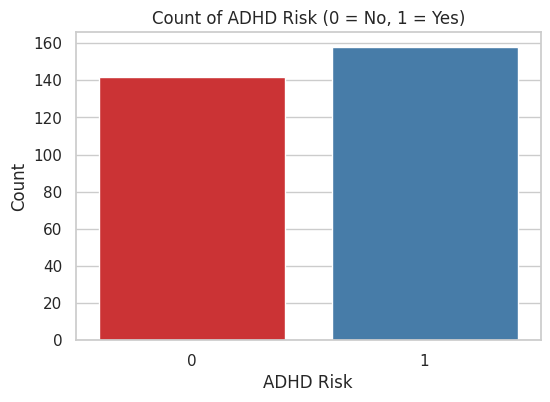

In [18]:
# Hiển thị thông tin bộ dữ liệu (để kiểm tra các cột và dữ liệu)
print(df.head())

# **Biểu đồ phân phối của các cột số**
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ phân phối cho các cột số
df_numeric = df.select_dtypes(include=["float64", "int64"])  # Chọn các cột số
for col in df_numeric.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, color="blue", bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# **Biểu đồ hộp (box plot) cho các cột số**
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numeric, palette="Set2")
plt.title("Box plot for numerical columns")
plt.show()

# **Biểu đồ tương quan giữa các yếu tố**
corr = df.corr()  # Tính ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation heatmap")
plt.show()

# **Biểu đồ phân loại ADHD Risk**
plt.figure(figsize=(6, 4))
sns.countplot(x="ADHD_Risk", data=df, palette="Set1")
plt.title("Count of ADHD Risk (0 = No, 1 = Yes)")
plt.xlabel("ADHD Risk")
plt.ylabel("Count")
plt.show()

In [19]:
new_data = pd.DataFrame({
    "Age": [19],
    "Gender": [0],  # 0 = Female (mã hóa từ LabelEncoder)
    "Family_ADHD_History": [1],  # Có tiền sử gia đình mắc ADHD
    "Inattention_Level": [7],  # Mức độ thiếu tập trung cao
    "Impulsivity_Frequency": [6],  # Tần suất bốc đồng trung bình
    "Hyperactivity_Level": [8],  # Mức độ tăng động cao
    "Sitting_Still_Time": [3],  # Thời gian ngồi yên rất ngắn
    "Sleep_Hours": [5],  # Thời gian ngủ thấp hơn khuyến nghị
    "Electronic_Device_Hours": [4],  # Sử dụng thiết bị điện tử ở mức trung bình
    "Peer_Family_Relationship": [1],  # Mối quan hệ xã hội trung bình
    "Academic_Stress": [2]  # Áp lực học tập cao
})


In [28]:
new_data = pd.DataFrame({
    "Age": [10],
    "Gender": [0],  # 0 = Female (mã hóa từ LabelEncoder)
    "Family_ADHD_History": [0],  # Có tiền sử gia đình mắc ADHD
    "Inattention_Level": [3],  # Mức độ thiếu tập trung cao
    "Impulsivity_Frequency": [6],  # Tần suất bốc đồng trung bình
    "Hyperactivity_Level": [4],  # Mức độ tăng động cao
    "Sitting_Still_Time": [1],  # Thời gian ngồi yên rất ngắn
    "Sleep_Hours": [8],  # Thời gian ngủ thấp hơn khuyến nghị
    "Electronic_Device_Hours": [2],  # Sử dụng thiết bị điện tử ở mức trung bình
    "Peer_Family_Relationship": [2],  # Mối quan hệ xã hội trung bình
    "Academic_Stress": [2]  # Áp lực học tập cao
})


In [29]:
# Chuẩn hóa dữ liệu mới
new_data_scaled = scaler.transform(new_data)


In [30]:
# Dự đoán kết quả
prediction = best_model.predict(new_data_scaled)

# Hiển thị kết quả
print("Predicted ADHD Risk:", "Yes" if prediction[0] == 1 else "No")


Predicted ADHD Risk: No
